### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-03 21:41:45,657	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [2]:
n = 10
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=10)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 242 (seed=3282652575, Fri Feb  3 21:41:46 2023)


In [3]:
trainer.train(500, 'centered2')

         iter : 1
  median_eval : -430.6865539550781
pop_best_eval : -6.872007369995117
    mean_eval : -478.53289794921875
    best_eval : -6.872007369995117
   worst_eval : -1131.2288818359375

         iter : 2
  median_eval : -536.80615234375
pop_best_eval : -36.180477142333984
    mean_eval : -519.1194458007812
    best_eval : -6.872007369995117
   worst_eval : -1131.2288818359375

         iter : 3
  median_eval : -450.0644836425781
pop_best_eval : -97.87049102783203
    mean_eval : -472.62286376953125
    best_eval : -6.872007369995117
   worst_eval : -1297.4091796875

         iter : 4
  median_eval : -678.1445922851562
pop_best_eval : -286.8822021484375
    mean_eval : -669.5767822265625
    best_eval : -6.872007369995117
   worst_eval : -1437.45556640625

         iter : 5
  median_eval : -536.012939453125
pop_best_eval : -2.3087337017059326
    mean_eval : -534.4669189453125
    best_eval : -2.3087337017059326
   worst_eval : -1437.45556640625

         iter : 6
  median_eva

In [4]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [5]:
network = trainer.get_trained_network()

#### Visualize trained network

In [6]:
organism = generate_organism(20, device)
graph = organism.toGraph()
visualizer = Visualizer()

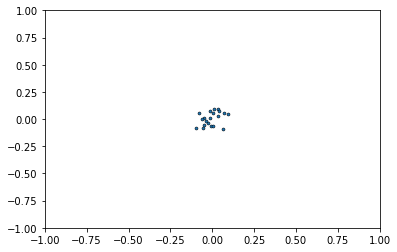

In [7]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim)